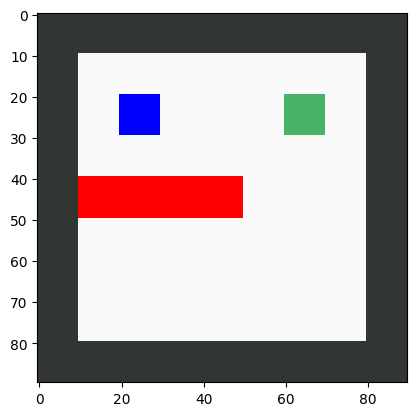

In [10]:
import rlnav
import os
import gymnasium as gym
import imageio
import importlib
import numpy as np
from rlnav import Poi
import matplotlib.pyplot as plt

# Create environment
env = Poin(goal_conditioned=True)
plt.imshow(env.render())


### Run a random policy inside it, save images at each state, and show the video

In [15]:
import shutil
import pathlib
import cv2
from typing import Union



def create_dir(directory_name: str, replace=False):

    directory_path = os.path.abspath(directory_name)
    directory_path += os.path.sep

    if os.path.isdir(directory_path):
        # Directory already exists
        if replace:
            shutil.rmtree(directory_path)
        else:
            return

    dir_parts = directory_path.split(os.sep)
    directory_to_create = ""
    for part in dir_parts:
        directory_to_create += part + os.sep
        if not os.path.isdir(directory_to_create):
            try:
                os.mkdir(directory_to_create)
            except FileNotFoundError:
                print("failed to create dir " + str(directory_to_create))
                raise Exception


def generate_video(images, output_directory: Union[str, pathlib.PosixPath] = pathlib.Path('.').absolute(), filename: str = "generated_video.mp4", convert_to_bgr=True):
    """
    generate a video from the given list of images, and save them at location output_directory/filename.mp4.
    @param images: List of images as numpy array of pixels. For each image, the expected shape is width * height * 3.
        images[n][-1] is expected to be a list of rgb pixels. But BGR pixels are accepted if convert_to_bgr is set to
        false.
    @param output_directory: A path. A '/' is added at the end if there's none in the given path.
    @param filename: a filename. Should not contain "/" characters or '.' except for the extension. If no '.' is found
        (aka no extension) a ".mp4" is added at the end.
    @param convert_to_bgr: (boolean) If True (default value), the colors are considered as RGB and are converted to BGR
        (which is the default opencv standard, don't ask me why).
    """
    if isinstance(output_directory, pathlib.PosixPath):
        output_directory = str(output_directory.absolute())
    directory_path = os.path.abspath(output_directory)
    directory_path += os.path.sep

    # Convert image colors
    if convert_to_bgr:
        images = [cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR) for img in images]

    if output_directory[-1] != os.sep:
        output_directory += os.sep

    # Verify filename
    if len(filename) < 4 or filename[-4:] != ".mp4":
        filename += ".mp4"
    assert len(filename.split(".")) == 2

    create_dir(output_directory)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    height, width, channels = images[0].shape
    fps = 30

    out = cv2.VideoWriter(output_directory + filename, fourcc, fps, (width, height))
    for image_data in images:
        image_data = image_data.astype(np.uint8)
        out.write(image_data)
    out.release()


frames = []
done = False
obs, _ = env.reset()
while not done:
    action = env.action_space.sample()  # Select a random action
    obs, reward, done, _, _ = env.step(action)

    # Render and save frame
    frame = env.render()
    frames.append(frame)

# Save video
generate_video(frames, filename="random_policy.mp4")

/home/hedwin/computing/projects/NavigationRLEnvironments/test_notebooks/random_policy.mp4


TypeError: a bytes-like object is required, not 'NoneType'

<IPython.core.display.Video object>

### Try the same with goal-conditioned settings

In [ ]:
env = GridWorld(goal_conditioned=True)
env.reset()
env.render()

frames = []
done = False
obs, _ = env.reset()
while not done:
    action = env.action_space.sample()
    obs, reward, done, _, _ = env.step(action)

    frame = env.render()
    frames.append(frame)

video_path = "goal_conditioned_policy.mp4"
imageio.mimsave(video_path, frames, fps=5)
Video(video_path)